In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

import random



C:\Users\singh\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
(x_train, y_train) , (x_test, y_test)=datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1,)

In [9]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [10]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(x_train)


In [11]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [12]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

46270


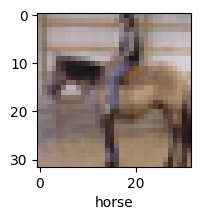

In [13]:
random_number = random.randint(0, 49999)
print(random_number)
plot_sample(x_train, y_train, random_number)

In [14]:
cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_initializer='he_uniform'),
    layers.Dense(10, activation='softmax')
])

C:\Users\singh\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# cnn.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

from keras.optimizers import SGD
opt = SGD(learning_rate=0.001, momentum=0.9)
cnn.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
cnn.fit(x_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 279s 178ms/step - accuracy: 0.4933 - loss: 1.3852
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 91ms/step - accuracy: 0.5677 - loss: 1.2001
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 90ms/step - accuracy: 0.6122 - loss: 1.0709
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 124s 79ms/step - accuracy: 0.6452 - loss: 0.9853
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 119s 76ms/step - accuracy: 0.6731 - loss: 0.9123
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 121s 78ms/step - accuracy: 0.6947 - loss: 0.8575
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 133s 85ms/step - accuracy: 0.7075 - loss: 0.8174
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 277s 177ms/step - accuracy: 0.7217 - loss: 0.7857
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 288s 184ms/step - accuracy: 0.7325 - loss: 0.7466
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 268s 172ms/step - accuracy: 0.7465 - loss: 0.7181


In [18]:
cnn.save('newModel1.h5')
cnn.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.7469 - loss: 0.7155


[0.7227566838264465, 0.7479000091552734]

In [ ]:
cnn.save('final_model.keras')

In [19]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step


array([[7.0896340e-06, 3.9427482e-06, 3.5729216e-04, 4.4665948e-01,
        8.7317385e-05, 5.4067171e-01, 1.2140650e-02, 2.8940425e-05,
        2.3615015e-05, 1.9997622e-05],
       [1.4435055e-04, 1.3005128e-02, 9.3865260e-08, 1.1048293e-06,
        3.1558923e-08, 4.5823217e-08, 8.7826116e-08, 7.5511963e-08,
        9.8682445e-01, 2.4629844e-05],
       [8.3615363e-04, 2.0493053e-02, 1.1377232e-04, 7.1304198e-04,
        4.3573000e-05, 8.9641893e-05, 8.1037775e-05, 7.7306955e-05,
        9.7181547e-01, 5.7368898e-03],
       [1.3170688e-01, 1.6283692e-03, 2.9828250e-02, 1.0038241e-02,
        1.8589277e-02, 8.9042768e-04, 3.4750023e-04, 3.2689362e-03,
        8.0282503e-01, 8.7712921e-04],
       [2.8060056e-05, 4.9364889e-06, 1.3758998e-02, 1.3749927e-02,
        2.2318337e-02, 1.1337315e-04, 9.5001125e-01, 5.7142124e-06,
        3.4657890e-06, 5.8247701e-06]], dtype=float32)

In [20]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[5, 8, 8, 8, 6]

In [21]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

Image Number: 2160


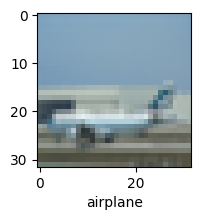

In [24]:
random_number = random.randint(0, 9999)
print("Image Number:", random_number)
plot_sample(x_test, y_test,random_number)

In [25]:
print("Image Number:", random_number)
print("This image is a(n):", classes[y_classes[random_number]])

Image Number: 2160
This image is a(n): airplane


313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step
Image Number: 3066


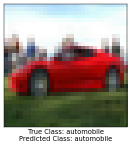

In [26]:
# Predictions on the test set
y_pred = cnn.predict(x_test)
y_classes = [np.argmax(element) for element in y_pred]

def plot_sample_prediction(X, y_true, y_pred, classes, index):
    plt.figure(figsize=(15, 4), dpi=40)
    plt.imshow(X[index])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel("True Class: " + classes[y_true[index]] + "\nPredicted Class: " + classes[y_pred[index]], fontsize=12)

# Visualize some random predictions
random_number = random.randint(0, len(x_test) - 1)
print("Image Number:", random_number)
plot_sample_prediction(x_test, y_test, y_classes, classes, random_number)
plt.show()

In [31]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('newModel1.h5')

# Dictionary to map class indices to class names
class_names = {0: "airplane", 1: "automobile", 2: "bird", 3: "cat", 4: "deer",
               5: "dog", 6: "frog", 7: "horse", 8: "ship", 9: "truck"}

# Function to preprocess the captured frame
def preprocess_frame(frame):
    # Resize frame to match the input size of the model (32x32)
    resized_frame = cv2.resize(frame, (32, 32))
    # Normalize pixel values to be in the range [0, 1]
    normalized_frame = resized_frame / 255.0
    # Expand dimensions to match the input shape of the model (add batch dimension)
    preprocessed_frame = np.expand_dims(normalized_frame, axis=0)
    return preprocessed_frame

# Function to classify the captured frame
def classify_frame(frame):
    # Preprocess the frame
    preprocessed_frame = preprocess_frame(frame)
    # Predict class probabilities using the model
    predictions = model.predict(preprocessed_frame)
    # Get the predicted class index
    predicted_class_index = np.argmax(predictions)
    # Get the predicted class label
    predicted_class_label = class_names[predicted_class_index]
    return predicted_class_label

# Open the webcam
cap = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Classify the captured frame
    predicted_class = classify_frame(frame)

    # Display the frame along with the predicted class label
    cv2.putText(frame, predicted_class, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.imshow('Webcam', frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close all windows
cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━